# **My Data Preprocessing Templete - Student Task**

---



1.0 Importing &  install libraries

In [1]:
!pip install xgboost
!pip install catboost
!pip install optuna

In [2]:
#Basic libraries for EDA
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels as sm

In [3]:
#sklearn library
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler,RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import  cross_val_score #Hyperparameter Tuning

In [4]:
#xgboost library
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

In [5]:
#lgb library
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [6]:
#catboost library
from catboost import CatBoostClassifier

In [7]:
import optuna

In [8]:
import warnings
# Set global warning filter
warnings.filterwarnings("ignore")
# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*num_leaves.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*No further splits with positive gain.*")

In [9]:
from statsmodels.formula.api import ols

model = sm.formula.ols(formula, data).fit()

AttributeError: module 'statsmodels.formula' has no attribute 'ols'

1.1 Import + Load Data

In [10]:
df = pd.read_csv("Churn_Modelling.csv")

In [11]:
data = df

2. E.D.A

In [12]:
df.shape

(10000, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
train = pd.read_csv('Churn_Modelling.csv', index_col = 'RowNumber')
trainX = train.drop(['Exited'], axis=1)
trainy = train['Exited']
test = pd.read_csv('Churn_Modelling.csv', index_col = 'RowNumber')

3. Feature Engineering

Age Binning

In [16]:
class AgeBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['Age'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed,
                                       name=f'QCut{self.n_bins}_Age',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)

AgeBinning(5).fit_transform(train)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,QCut5_Age
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,2
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2


Credit Score Binning

In [17]:
class CreditScoreBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['CreditScore'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed,
                                       name=f'QCut{self.n_bins}_CreditScore',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)

CreditScoreBinning(5).fit_transform(train)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,QCut5_CreditScore
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,4
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3


Estimated Salary Binning

In [18]:
class SalaryBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['EstimatedSalary'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed,
                                       name=f'QCut{self.n_bins}_Est_Salary',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)

SalaryBinning(10).fit_transform(train)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,QCut10_Est_Salary
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,5
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,5
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,5
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,4
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,4
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2


Balance to Salary Ratio

In [19]:
class BalanceSalaryRatioTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Balance_Salary_Ratio'] = X_copy['Balance'] / X_copy['EstimatedSalary']

        return X_copy

BalanceSalaryRatioTransformer().fit_transform(train)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_Salary_Ratio
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.000000
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.564108
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.000000


Geography and Gender interaction

In [20]:
class GeoGenderTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Geo_Gender'] = X_copy['Geography'] + '_' + X_copy['Gender']
        return X_copy

GeoGenderTransformer().fit_transform(train)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Gender
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,France_Female
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Spain_Female
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,France_Female
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,France_Female
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Spain_Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,France_Male
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,France_Male
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,France_Female


Total Products used

In [21]:
class TotalProductsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Total_Products_Used'] = X_copy['NumOfProducts'] + X_copy['HasCrCard']
        return X_copy

TotalProductsTransformer().fit_transform(train)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Total_Products_Used
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,3
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,2
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1


Gender Total Product interaction

In [22]:
class TpGenderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_products_field='Total_Products_Used', gender_field='Gender'):
        self.total_products_field = total_products_field
        self.gender_field = gender_field

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Tp_Gender'] = X_copy[self.total_products_field].astype('str') + X_copy[self.gender_field]
        return X_copy

train_tp = TotalProductsTransformer().fit_transform(train)
TpGenderTransformer().fit_transform(train_tp)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Total_Products_Used,Tp_Gender
RowNumber,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,2Female
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,1Female
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4,4Female
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2,2Female
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,2Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,3,3Male
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,2,2Male
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,1Female


TFIDF-PCA (Text Transformation)

In [23]:
class TFIDFPCATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column, max_features, n_components):
        self.column = column
        self.max_features = max_features
        self.n_components = n_components
        self.vectorizer = TfidfVectorizer(max_features=max_features)
        self.svd = TruncatedSVD(n_components=n_components)

    def fit(self, X, y=None):
        vectors = self.vectorizer.fit_transform(X[self.column])
        self.svd.fit(vectors)
        return self

    def transform(self, X):
        vectors = self.vectorizer.transform(X[self.column])
        svd_result = self.svd.transform(vectors)

        tfidf_df = pd.DataFrame(svd_result, columns=[f"{self.column}_tfidf_{i}" for i in range(self.n_components)])
        X = pd.concat([X, tfidf_df], axis="columns")
        return X

TFIDFPCATransformer(column="Surname", max_features=1000, n_components=5).fit_transform(train)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4
1,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.000352,0.006496,0.012453,-0.005980,0.000058
2,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.000007,0.000032,-0.000059,0.000033,-0.000141
3,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,-0.000174,0.001222,0.001379,0.004298,-0.002752
4,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,-0.006202,0.000390,0.011816,-0.059550,-0.030506
5,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,-0.004487,-0.011471,0.004267,0.007362,0.033054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,-0.000192,-0.000076,-0.000468,0.000346,-0.001337
9998,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,0.000067,0.000184,0.000256,-0.000231,-0.000636
9999,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,0.001370,0.045753,-0.186811,0.120953,-0.197763
10000,15628319.0,Walker,792.0,France,Female,28.0,4.0,130142.79,1.0,1.0,0.0,38190.78,0.0,NaN,NaN,NaN,NaN,NaN


k-Means Clusterer

In [24]:
class KMeansClusterer(BaseEstimator, TransformerMixin):
    def __init__(self, features, n_clusters=20, random_state=0, n_components=None):
        self.features = features
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.n_components = n_components
        self.kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=random_state)
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)

    def fit(self, X, y=None):
        X_scaled = self.scaler.fit_transform(X.loc[:, self.features])
        if self.n_components is not None:
            X_scaled = self.pca.fit_transform(X_scaled)
        self.kmeans.fit(X_scaled)
        return self

    def transform(self, X):
        X_scaled = self.scaler.transform(X.loc[:, self.features])

    # Check for NaN values and replace them with zeros or appropriate values
        if np.isnan(X_scaled).any():
            X_scaled = np.nan_to_num(X_scaled)

        if self.n_components is not None:
            X_scaled = self.pca.transform(X_scaled)

        X_new = pd.DataFrame()
        X_new["Cluster"] = self.kmeans.predict(X_scaled)

        X_copy = X.copy()
        # Convert the "Cluster" column to dense format
        X_new["Cluster"] = X_new["Cluster"].values
        return pd.concat([X_copy.reset_index(drop=True), X_new.reset_index(drop=True)], axis=1)

In [25]:
#With PCA (specify the number of components, e.g., 3)
clusterer_with_pca = KMeansClusterer(features=["CustomerId","EstimatedSalary","Balance"], n_clusters=10, random_state=123, n_components=3)

# Fit and transform your data
clusterer_with_pca.fit_transform(train)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,6
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,7
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,8
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,3
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,7
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2


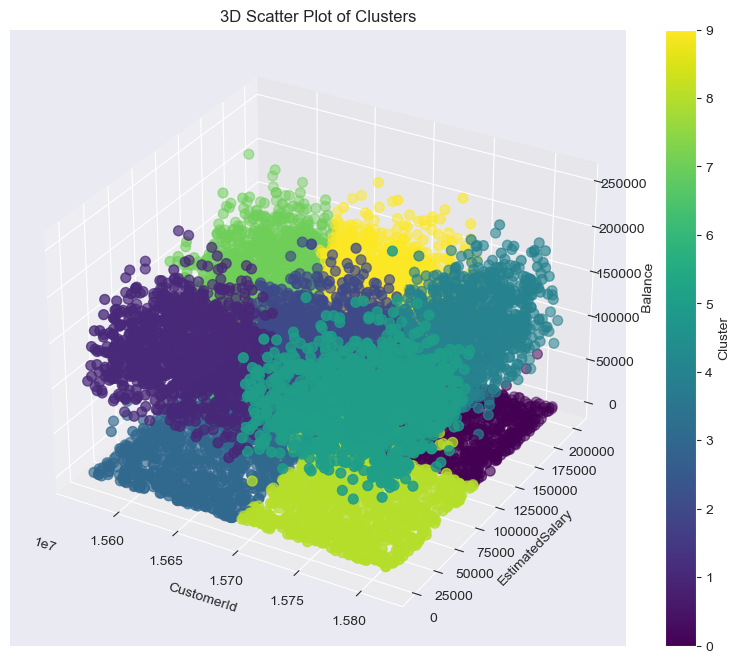

In [26]:
#Visualising the clusters
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train is your training data
X_train_selected = train[["CustomerId","EstimatedSalary","Balance"]]

# Fit and transform with PCA and KMeansClusterer
clusterer_with_pca.fit(X_train_selected)
X_transformed = clusterer_with_pca.transform(X_train_selected)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points colored by cluster
scatter = ax.scatter(X_transformed["CustomerId"], X_transformed["EstimatedSalary"], X_transformed["Balance"], c=X_transformed["Cluster"], cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel("CustomerId")
ax.set_ylabel("EstimatedSalary")
ax.set_zlabel('Balance')
ax.set_title('3D Scatter Plot of Clusters')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.show()

4. Assembling the Pipeline

Column Transformer

In [27]:
#applies transformers to different columns.
multicolumn_prep = ColumnTransformer([ ('encode',
                                        OneHotEncoder(handle_unknown='ignore'),
                                        ['Gender', 'Geography','NumOfProducts','HasCrCard','IsActiveMember','Geo_Gender','Tp_Gender']),
                                       ],
                                     remainder='passthrough')
multicolumn_prep

ColumnTransformer(remainder='passthrough',
                  transformers=[('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Geography', 'NumOfProducts',
                                  'HasCrCard', 'IsActiveMember', 'Geo_Gender',
                                  'Tp_Gender'])])

Drop Column

In [28]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        return X.drop(self.cols, axis=1)

In [29]:
named_preprocessing_pipeline = Pipeline([
    ('kmeans', KMeansClusterer(features=["CustomerId","EstimatedSalary","Balance"], n_clusters=10, random_state=123, n_components=3)),
    ('surname_tfid', TFIDFPCATransformer(column="Surname", max_features=1000, n_components=5)),
    ('age_binning', AgeBinning(5)),
    ('salary_binning', SalaryBinning(10)),
    ('balance_salary_ratio', BalanceSalaryRatioTransformer()),
    ('geo_gender', GeoGenderTransformer()),
    ('total_products', TotalProductsTransformer()),
    ('tp_gender', TpGenderTransformer()),
    ('drop', DropColumn(cols=['CustomerId','Surname'])),
    ('prep',ColumnTransformer([ ('encode',
                                 OneHotEncoder(handle_unknown='ignore',sparse_output=False),
                                 ['Gender', 'Geography','NumOfProducts','HasCrCard','IsActiveMember','Geo_Gender','Tp_Gender']),
                                ],
                              remainder='passthrough').set_output(transform='pandas')),
])

named_preprocessing_pipeline

Pipeline(steps=[('kmeans',
                 KMeansClusterer(features=['CustomerId', 'EstimatedSalary',
                                           'Balance'],
                                 n_clusters=10, n_components=3,
                                 random_state=123)),
                ('surname_tfid',
                 TFIDFPCATransformer(column='Surname', max_features=1000,
                                     n_components=5)),
                ('age_binning', AgeBinning(n_bins=5)),
                ('salary_binning', SalaryBinning(n_bins=10)),
                ('balance_salary_ratio', BalanceSalaryRa...
                ('total_products', TotalProductsTransformer()),
                ('tp_gender', TpGenderTransformer()),
                ('drop', DropColumn(cols=['CustomerId', 'Surname'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Geography',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'Geo_Gender',
                                                   'Tp_Gender'])]))])

In [30]:
#checking output on train df
df_train = named_preprocessing_pipeline.fit_transform(train.drop(['Exited'], axis=1))
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   encode__Gender_Female              10000 non-null  float64
 1   encode__Gender_Male                10000 non-null  float64
 2   encode__Geography_France           10000 non-null  float64
 3   encode__Geography_Germany          10000 non-null  float64
 4   encode__Geography_Spain            10000 non-null  float64
 5   encode__NumOfProducts_1            10000 non-null  float64
 6   encode__NumOfProducts_2            10000 non-null  float64
 7   encode__NumOfProducts_3            10000 non-null  float64
 8   encode__NumOfProducts_4            10000 non-null  float64
 9   encode__HasCrCard_0                10000 non-null  float64
 10  encode__HasCrCard_1                10000 non-null  float64
 11  encode__IsActiveMember_0           10000 non-null  floa

In [31]:
#checking output on test df
df_test = pd.DataFrame(named_preprocessing_pipeline.transform(test))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   encode__Gender_Female              10000 non-null  float64
 1   encode__Gender_Male                10000 non-null  float64
 2   encode__Geography_France           10000 non-null  float64
 3   encode__Geography_Germany          10000 non-null  float64
 4   encode__Geography_Spain            10000 non-null  float64
 5   encode__NumOfProducts_1            10000 non-null  float64
 6   encode__NumOfProducts_2            10000 non-null  float64
 7   encode__NumOfProducts_3            10000 non-null  float64
 8   encode__NumOfProducts_4            10000 non-null  float64
 9   encode__HasCrCard_0                10000 non-null  float64
 10  encode__HasCrCard_1                10000 non-null  float64
 11  encode__IsActiveMember_0           10000 non-null  floa

In [32]:
class RobustScalerNamed(RobustScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [33]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + [('scale',RobustScaler().set_output(transform='pandas')),])
modelling_pipeline

Pipeline(steps=[('kmeans',
                 KMeansClusterer(features=['CustomerId', 'EstimatedSalary',
                                           'Balance'],
                                 n_clusters=10, n_components=3,
                                 random_state=123)),
                ('surname_tfid',
                 TFIDFPCATransformer(column='Surname', max_features=1000,
                                     n_components=5)),
                ('age_binning', AgeBinning(n_bins=5)),
                ('salary_binning', SalaryBinning(n_bins=10)),
                ('balance_salary_ratio', BalanceSalaryRa...
                ('total_products', TotalProductsTransformer()),
                ('tp_gender', TpGenderTransformer()),
                ('drop', DropColumn(cols=['CustomerId', 'Surname'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Geography',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'Geo_Gender',
                                                   'Tp_Gender'])])),
                ('scale', RobustScaler())])

In [34]:
modelling_pipeline.fit_transform(train.drop(['Exited'], axis=1))

,encode__Gender_Female,encode__Gender_Male,encode__Geography_France,encode__Geography_Germany,encode__Geography_Spain,encode__NumOfProducts_1,encode__NumOfProducts_2,encode__NumOfProducts_3,encode__NumOfProducts_4,encode__HasCrCard_0,...,remainder__Cluster,remainder__Surname_tfidf_0,remainder__Surname_tfidf_1,remainder__Surname_tfidf_2,remainder__Surname_tfidf_3,remainder__Surname_tfidf_4,remainder__QCut5_Age,remainder__QCut10_Est_Salary,remainder__Balance_Salary_Ratio,remainder__Total_Products_Used
0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.1,-0.493389,0.0
1,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.4,115.485982,190.177848,164.088420,135.523854,-14.223283,0.5,0.1,-0.001536,-1.0
2,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,...,0.6,-0.216488,1.547050,-1.299371,-0.770167,-1.561222,0.5,0.1,0.432208,2.0
3,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,...,0.8,-15.850056,-84.265065,-155.801007,56.686366,100.222466,0.0,-0.1,-0.493389,0.0
4,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.4,-338.797875,135.997249,34.962453,105.928079,253.831807,0.5,-0.3,0.554848,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,...,-0.2,0.007745,0.000193,0.001158,0.003082,0.003518,0.0,-0.1,-0.493389,1.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,33.600725,-147.194382,-31.638579,20.569888,27.774226,-0.5,0.1,-0.120801,0.0
9997,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.2,20.383093,-8.486996,18.040733,-8.667314,44.186136,0.0,-0.5,-0.493389,-1.0
9998,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,...,-0.4,-7.078499,-4.232778,-13.458320,2.651435,-0.642721,0.5,-0.1,0.040441,1.0


5. Setting up the Models

XGBoost Classifier

In [35]:
X = train.drop(['Exited'], axis=1)
y = train['Exited']

In [37]:
# #XGBoost parameters
xgb_params_1 = {'max_depth': 8,
  'min_child_weight': 9,
  'learning_rate': 0.015784217705381666,
  'n_estimators': 928,
  'subsample': 0.8311128887439883,
  'colsample_bytree': 0.3454344427319984,
 'random_state': 42}


#XGBoost best parameters {'max_depth': 5, 'min_child_weight': 2, 'learning_rate': 0.07353564842520434, 'n_estimators': 463, 'subsample': 0.8131149969184862, 'colsample_bytree': 0.6598001508811656, 'random_state': 42}
xgb_params_optuna = {'max_depth': 5,
                     'min_child_weight': 2,
                     'learning_rate': 0.07353564842520434,
                     'n_estimators': 463,
                     'subsample': 0.8131149969184862,
                     'colsample_bytree': 0.6598001508811656,
                     'random_state': 42}

# XGBoost model
xgb_model = XGBClassifier(**xgb_params_optuna )

xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)
xgb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('kmeans',
                                  KMeansClusterer(features=['CustomerId',
                                                            'EstimatedSalary',
                                                            'Balance'],
                                                  n_clusters=10, n_components=3,
                                                  random_state=123)),
                                 ('surname_tfid',
                                  TFIDFPCATransformer(column='Surname',
                                                      max_features=1000,
                                                      n_components=5)),
                                 ('age_binning', AgeBinning(n_bins=5)),
                                 ('salary_binning', SalaryBinning(n_bins=10)),
                                 ('balance_s...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.07353564842520434, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=463, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [38]:
# # number of folds
n_splits = 10

# #  StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# #  cross-validation results
cv_results = []

# # stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

xgb_pipeline.fit(X_train, y_train )

#     # predictions on the validation set
y_val_pred_prob = xgb_pipeline.predict(X_val)
y_pred = xgb_pipeline.predict(X_val)

f1=  f1_score(y_val, y_pred, average='weighted')

#     # Evaluating the model

roc_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
print('-'*70)

#     # results
cv_results.append(roc_auc)

# # average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')

KeyError: '[0] not in index'

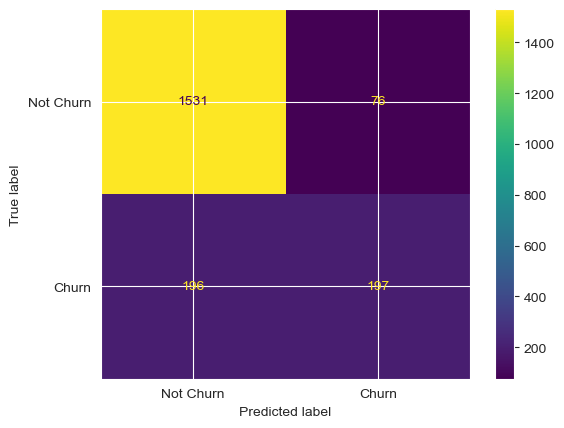

In [40]:
# Assuming trainX and trainy are your features and target variable
X_train, X_val, y_train, y_val = train_test_split(trainX, trainy, test_size=0.2, random_state=42)

xgb_pipeline.fit(X = X_train,
                 y = y_train)

predictions_xgb = xgb_pipeline.predict(X_val)

cm_xgb = confusion_matrix(y_val, predictions_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not Churn', 'Churn'])
disp.plot()
plt.show()

Step 5: Split the data into test and train sets 

Step 6: Data scaling